There are two Kim et al. datasets, one uses all available cells (currently used in the 4DN tutorial of Higashi) and one with stricter filtering standard (we used in Higashi and Fast-Higashi manuscript). We refer to them as 4DN_all and 4DN_subset. We'll run Fast-Higashi on both of these dataset. Let's try 4DN_subset first. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fasthigashi.FastHigashi_Wrapper import *
# Set the path to the configuration file, change it accordingly
# The format of the config file is the same as the Higashi config JSON
config = "/home/rzhang/fast_higashi_git/config_dir/config_sciHiC_Kim_4DN_higashi_500k.JSON"

In [3]:
# initialize the model
wrapper = FastHigashi(config_path=config,
                      path2input_cache=None, # when setting at None, will use the temp_dir on the JSON file
                      path2result_dir=None, # same as above
                      off_diag=100,
                      filter=True,
                      do_conv=True, # dataset with low coverage, turn on conv
                      do_rwr=True, # dataset with low coverage, turn on partial rwr
                      do_col=False,
                      no_col=False)


setting to gpu:1


In [4]:
# From contact pairs to the sparse matrices and store them on disk
if not os.path.exists(os.path.join(wrapper.temp_dir, "raw", "%s_sparse_adj.npy" % wrapper.chrom_list[0])):
    start = time.time()
    wrapper.fast_process_data()
    print("contact pairs to sparse mtx takes: %.2f s" % (time.time() - start))


generating start/end dict for chromosome
extracting from filelist.txt


  0%|          | 0/6388 [00:00<?, ?it/s]

fast process finishes
contact pairs to sparse mtx takes: 26.59 s


In [5]:
# packing data from sparse matrices to sparse tensors
start = time.time()
wrapper.prep_dataset(batch_norm=True) # when there's a batch_id given in the JSON, it will try to pre-correct batch related coverage bias / off-diag ratio bias
print("packing sparse mtx takes: %.2f s" % (time.time() - start))

total number of cells that pass qc check 2786 bad 3602 total: 6388
cache file = /home/rzhang/Higashi/Temp/sciHiC_Kim_4DN_higashi_500k/cache_intra_500000_offdiag_100_.pkl
will do per batch normalization


packing sparse mtx into sparse tensors:   0%|          | 0/22 [00:00<?, ?it/s]

Sorting indices in sparse tensors:   0%|          | 0/22 [00:00<?, ?it/s]

saving cached input to /home/rzhang/Higashi/Temp/sciHiC_Kim_4DN_higashi_500k/cache_intra_500000_offdiag_100_.pkl
gpu mem
c_nvmlMemory_t(total: 25757220864 B, free: 25430523904 B, used: 326696960 B)
sparsity 0.008046937544129775
sparsity below threshold, automatically col_normalize
do_conv True do_rwr True do_col True
recommend_bs_cell [2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786, 2786] pinning memory
packing sparse mtx takes: 40.39 s


In [6]:
wrapper.run_model(extra="", # can be any words, this will be appended to the model name when the model is saved. Used as an identifier.
                  rank=256,
                  n_iter_parafac=1,
                  tol=2e-5 # In the original manuscript, we use this 3e-4 tolerance, but later we found that setting it to smaller ones might lead to better performance on some data. For this dataset, it leads to more robust results to the initialization
                  )

# loading existing trained models
# This operation is optional when the model is just trained
wrapper.load_model(extra="",
                   rank=256,
                   n_iter_parafac=1
                   )

dim1_0.6_rank_256_niterp_1_
n_iter_parafac 1
time elapsed: 0.01


initializing params:   0%|          | 0/22 [00:00<?, ?it/s]

rwr iters: [5 5 5 5 5 5 5 4 5 4 5 4 5 4 4 4 4 4 5 5 4 4]
time elapsed: 23.60
finish init
Starting iteration 0

PARAFAC2 re=6.720 takes 11.9s
Starting iteration 1

PARAFAC2 re=0.427 9.96e-01 variation min9.8e-01 at chrom 20, max1.0e+00 at chrom 0 takes 11.6s
Starting iteration 2

PARAFAC2 re=0.419 3.82e-02 variation min1.6e-02 at chrom 3, max7.6e-02 at chrom 16 takes 12.0s
Starting iteration 3

PARAFAC2 re=0.412 3.07e-02 variation min2.5e-02 at chrom 13, max4.2e-02 at chrom 16 takes 12.2s
Starting iteration 4

PARAFAC2 re=0.410 1.42e-02 variation min1.1e-02 at chrom 20, max2.0e-02 at chrom 7 takes 12.1s
Starting iteration 5

PARAFAC2 re=0.408 6.34e-03 variation min9.6e-04 at chrom 20, max1.0e-02 at chrom 7 takes 12.2s
Starting iteration 6

PARAFAC2 re=0.408 3.41e-03 variation min-7.6e-04 at chrom 20, max6.0e-03 at chrom 7 takes 12.1s
Starting iteration 7

PARAFAC2 re=0.407 2.12e-03 variation min-7.9e-04 at chrom 20, max3.7e-03 at chrom 7 takes 12.2s
Starting iteration 8

PARAFAC2 re=0.4

Starting iteration 69

PARAFAC2 re=0.404 4.30e-05 variation min-3.3e-06 at chrom 21, max6.9e-05 at chrom 3 takes 12.8s
n_iter_para 8
Starting iteration 70

PARAFAC2 re=0.404 4.13e-05 variation min-3.3e-06 at chrom 21, max6.5e-05 at chrom 3 takes 12.8s
Starting iteration 71

PARAFAC2 re=0.404 4.35e-05 variation min-1.6e-06 at chrom 21, max6.6e-05 at chrom 3 takes 12.8s
Starting iteration 72

PARAFAC2 re=0.404 4.20e-05 variation min-4.9e-06 at chrom 21, max6.3e-05 at chrom 3 takes 12.8s
Starting iteration 73

PARAFAC2 re=0.404 4.01e-05 variation min-5.7e-06 at chrom 21, max6.1e-05 at chrom 3 takes 12.8s
Starting iteration 74

PARAFAC2 re=0.404 3.89e-05 variation min-8.2e-06 at chrom 21, max6.0e-05 at chrom 3 takes 12.8s
Starting iteration 75

PARAFAC2 re=0.404 3.84e-05 variation min-4.1e-06 at chrom 21, max5.6e-05 at chrom 3 takes 12.9s
Starting iteration 76

PARAFAC2 re=0.404 3.66e-05 variation min-4.9e-06 at chrom 21, max5.4e-05 at chrom 3 takes 12.8s
Starting iteration 77

PARAFAC2 re

In [34]:
# getting embedding
embed = wrapper.fetch_cell_embedding(final_dim=256,
                                     restore_order=False)

# 'embed_l2_norm' or 'embed_l2_norm_correct_coverage_fh' usually yields the best results, the latter one represents linear correction of sequencing depth bias.
print (embed.keys())

dict_keys(['embed_all', 'embed_raw', 'embed_l2_norm', 'restore_order', 'embed_correct_coverage_fh', 'embed_l2_norm_correct_coverage_fh'])


Index(['index', 'cell type', 'batch_id', 'coverage_fh'], dtype='object')
(6388, 2)


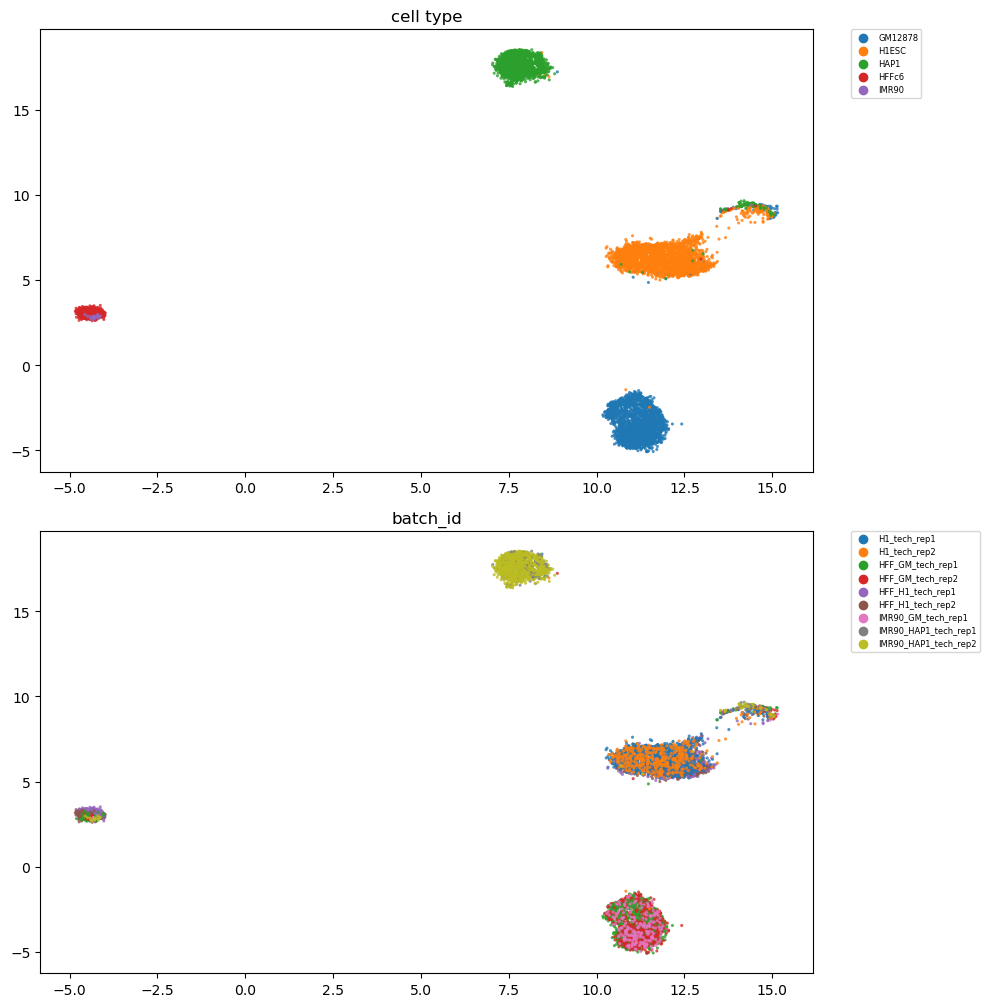

In [35]:
# Check available label information
print (wrapper.label_info.columns)
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
embedding = embed['embed_l2_norm']
vec = UMAP(n_components=2, n_neighbors=25, random_state=0).fit_transform(embedding)
print (vec.shape)

fig = plt.figure(figsize=(10, 30))
for col_index, col in enumerate(["cell type", "batch_id"]):
    ax = plt.subplot(6, 1, col_index + 1)
    sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=wrapper.label_info[col], ax=ax, s=5, alpha=0.8, linewidth=0, palette=None, hue_order=np.unique(wrapper.label_info[col]))
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, 
              borderaxespad=0., ncol=int(math.ceil(len(labels)) / 40 + 1), prop={'size': 6})
    ax.set_title(col)
plt.tight_layout()
plt.show()
plt.close('all')

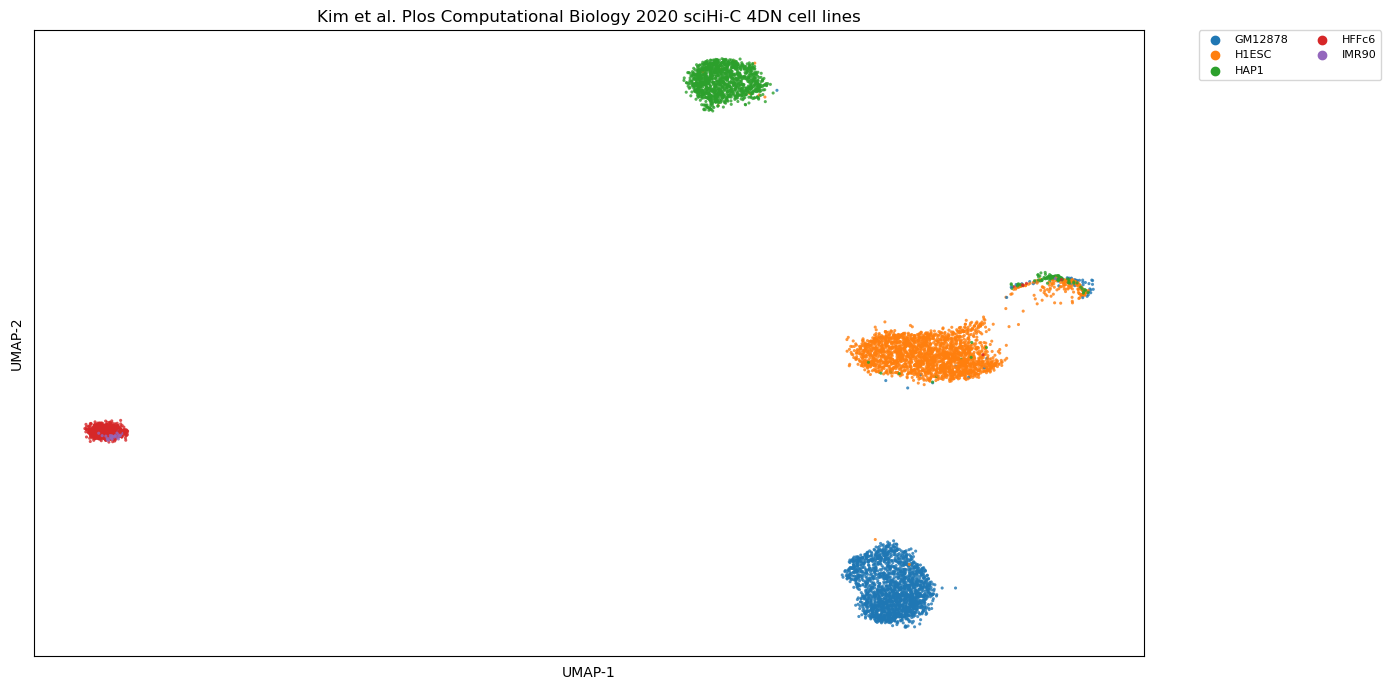

In [36]:
fig = plt.figure(figsize=(14, 7))
col = 'cell type'
ax=sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=wrapper.label_info[col], s=5, alpha=0.8, linewidth=0, palette=None, hue_order=np.unique(wrapper.label_info[col]))
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2, prop={'size':8})
ax.grid(False)
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title( "Kim et al. Plos Computational Biology 2020 sciHi-C 4DN cell lines")
plt.tight_layout()
plt.show()


OK, Now let's try 4DN_all

In [10]:
from fasthigashi.FastHigashi_Wrapper import *
# Set the path to the configuration file, change it accordingly
# The format of the config file is the same as the Higashi config JSON
config = "/home/rzhang/fast_higashi_git/config_dir/config_sciHiC_Kim_4DN_all_500k.JSON"

In [11]:
# initialize the model
wrapper_all = FastHigashi(config_path=config,
                      path2input_cache=None, # when setting at None, will use the temp_dir on the JSON file
                      path2result_dir=None, # same as above
                      off_diag=100,
                      filter=True,
                      do_conv=True, # dataset with low coverage, turn on conv
                      do_rwr=True, # dataset with low coverage, turn on partial rwr
                      do_col=False,
                      no_col=False)


setting to gpu:5


In [12]:
# From contact pairs to the sparse matrices and store them on disk
if not os.path.exists(os.path.join(wrapper_all.temp_dir, "raw", "%s_sparse_adj.npy" % wrapper_all.chrom_list[0])):
    start = time.time()
    wrapper_all.fast_process_data()
    print("contact pairs to sparse mtx takes: %.2f s" % (time.time() - start))


generating start/end dict for chromosome
extracting from filelist.txt


  0%|          | 0/16707 [00:00<?, ?it/s]

fast process finishes
contact pairs to sparse mtx takes: 43.39 s


In [13]:
# packing data from sparse matrices to sparse tensors
start = time.time()
wrapper_all.prep_dataset(batch_norm=True) # when there's a batch_id given in the JSON, it will try to pre-correct batch related coverage bias / off-diag ratio bias
print("packing sparse mtx takes: %.2f s" % (time.time() - start))

total number of cells that pass qc check 6404 bad 10303 total: 16707
cache file = /home/rzhang/Higashi/Temp/sciHiC_Kim_4DN_all_500k/cache_intra_500000_offdiag_100_.pkl
will do per batch normalization


packing sparse mtx into sparse tensors:   0%|          | 0/22 [00:00<?, ?it/s]

Sorting indices in sparse tensors:   0%|          | 0/22 [00:00<?, ?it/s]

saving cached input to /home/rzhang/Higashi/Temp/sciHiC_Kim_4DN_all_500k/cache_intra_500000_offdiag_100_.pkl
gpu mem
c_nvmlMemory_t(total: 25757220864 B, free: 25430523904 B, used: 326696960 B)
sparsity 0.004462150235585356
sparsity below threshold, automatically col_normalize
do_conv True do_rwr True do_col True
recommend_bs_cell [6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404, 6404] pinning memory
packing sparse mtx takes: 95.93 s


In [14]:

wrapper_all.run_model(extra="", # can be any words, this will be appended to the model name when the model is saved. Used as an identifier.
                  rank=256,
                  n_iter_parafac=1,
                  tol=2e-5 # In the original manuscript, we use this 3e-4 tolerance, but later we found that setting it to smaller ones might lead to better performance on some data. For this dataset, it leads to more robust results to the initialization
                  )

# loading existing trained models
# This operation is optional when the model is just trained
wrapper_all.load_model(extra="",
                   rank=256,
                   n_iter_parafac=1
                   )

dim1_0.6_rank_256_niterp_1_
n_iter_parafac 1
time elapsed: 1.19


initializing params:   0%|          | 0/22 [00:00<?, ?it/s]

rwr iters: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 4 5 5 5 4 4]
time elapsed: 78.76
finish init
Starting iteration 0

PARAFAC2 re=6.383 takes 15.4s
Starting iteration 1

PARAFAC2 re=0.513 9.94e-01 variation min9.7e-01 at chrom 20, max1.0e+00 at chrom 0 takes 15.3s
Starting iteration 2

PARAFAC2 re=0.505 3.10e-02 variation min1.8e-02 at chrom 2, max7.3e-02 at chrom 20 takes 15.3s
Starting iteration 3

PARAFAC2 re=0.500 2.16e-02 variation min1.5e-02 at chrom 21, max3.0e-02 at chrom 16 takes 15.3s
Starting iteration 4

PARAFAC2 re=0.498 7.93e-03 variation min-2.1e-03 at chrom 21, max1.2e-02 at chrom 3 takes 15.2s
Starting iteration 5

PARAFAC2 re=0.497 3.57e-03 variation min-3.7e-03 at chrom 21, max6.6e-03 at chrom 12 takes 15.1s
Starting iteration 6

PARAFAC2 re=0.496 2.02e-03 variation min-3.1e-03 at chrom 20, max4.0e-03 at chrom 2 takes 15.0s
Starting iteration 7

PARAFAC2 re=0.496 1.31e-03 variation min-2.3e-03 at chrom 20, max2.6e-03 at chrom 2 takes 15.0s
Starting iteration 8

PARAFAC2 re=


PARAFAC2 re=0.494 3.51e-05 variation min-4.4e-06 at chrom 16, max7.0e-05 at chrom 3 takes 16.2s
Starting iteration 69

PARAFAC2 re=0.494 3.40e-05 variation min-5.9e-06 at chrom 16, max6.6e-05 at chrom 3 takes 16.3s
n_iter_para 8
Starting iteration 70

PARAFAC2 re=0.494 3.19e-05 variation min-5.7e-06 at chrom 16, max6.3e-05 at chrom 3 takes 16.8s
Starting iteration 71

PARAFAC2 re=0.494 3.38e-05 variation min-5.4e-06 at chrom 16, max6.5e-05 at chrom 3 takes 15.9s
Starting iteration 72

PARAFAC2 re=0.494 3.26e-05 variation min-5.7e-06 at chrom 16, max6.1e-05 at chrom 3 takes 15.8s
Starting iteration 73

PARAFAC2 re=0.494 3.09e-05 variation min-6.7e-06 at chrom 16, max5.9e-05 at chrom 3 takes 15.9s
Starting iteration 74

PARAFAC2 re=0.494 3.02e-05 variation min-6.3e-06 at chrom 16, max5.5e-05 at chrom 3 takes 15.9s
Starting iteration 75

PARAFAC2 re=0.494 2.94e-05 variation min-7.0e-06 at chrom 16, max5.3e-05 at chrom 3 takes 16.1s
Starting iteration 76

PARAFAC2 re=0.494 2.86e-05 variat

In [37]:
# getting embedding
embed = wrapper_all.fetch_cell_embedding(final_dim=256,
                                     restore_order=False)

# 'embed_l2_norm' or 'embed_l2_norm_correct_coverage_fh' usually yields the best results, the latter one represents linear correction of sequencing depth bias.
print (embed.keys())

dict_keys(['embed_all', 'embed_raw', 'embed_l2_norm', 'restore_order', 'embed_correct_coverage_fh', 'embed_l2_norm_correct_coverage_fh'])


Index(['index', 'cell type', 'batch', 'coverage_fh'], dtype='object')


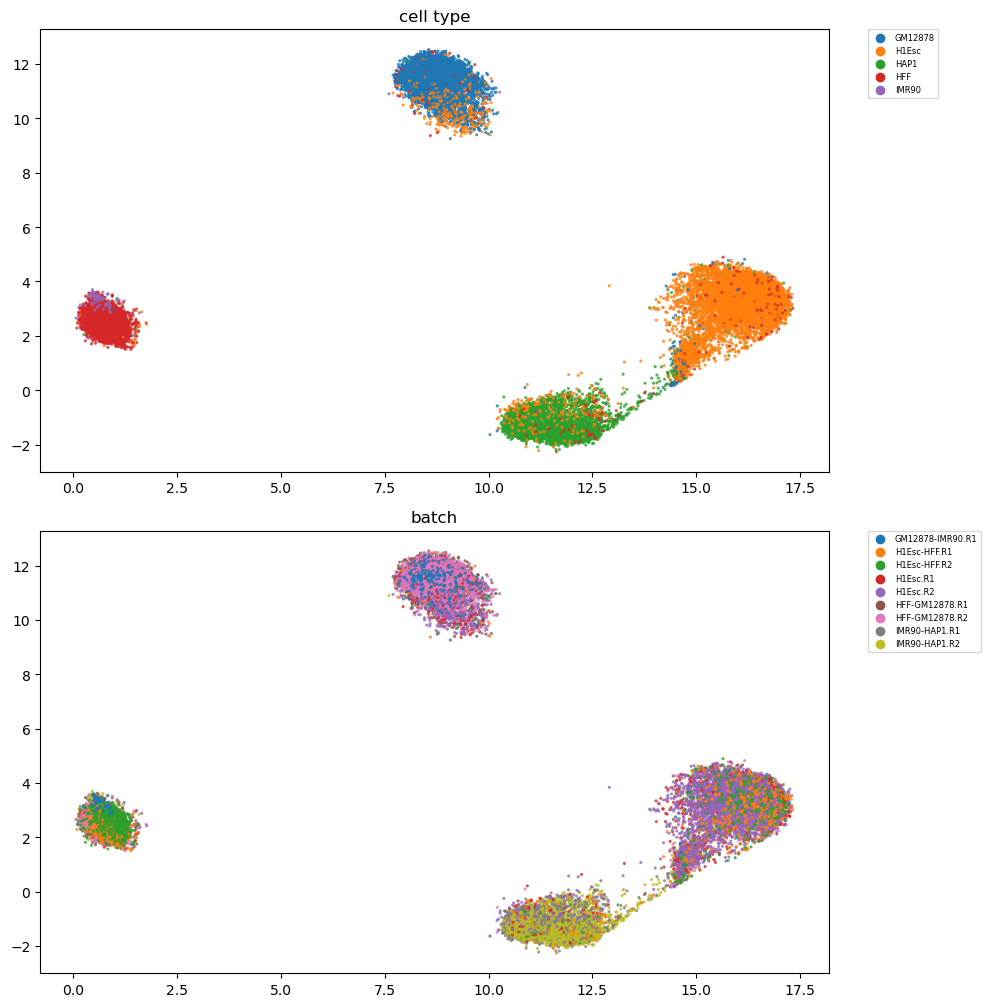

In [38]:
# Check available label information
print (wrapper_all.label_info.columns)
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
embedding = embed['embed_l2_norm_correct_coverage_fh']
vec = UMAP(n_components=2, n_neighbors=25, random_state=0).fit_transform(embedding)


fig = plt.figure(figsize=(10, 30))
for col_index, col in enumerate(["cell type", "batch"]):
    ax = plt.subplot(6, 1, col_index + 1)
    sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=wrapper_all.label_info[col], ax=ax, s=5, alpha=0.8, linewidth=0, palette=None, hue_order=np.unique(wrapper_all.label_info[col]))
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, 
              borderaxespad=0., ncol=int(math.ceil(len(labels)) / 40 + 1), prop={'size': 6})
    ax.set_title(col)
plt.tight_layout()
plt.show()
plt.close('all')

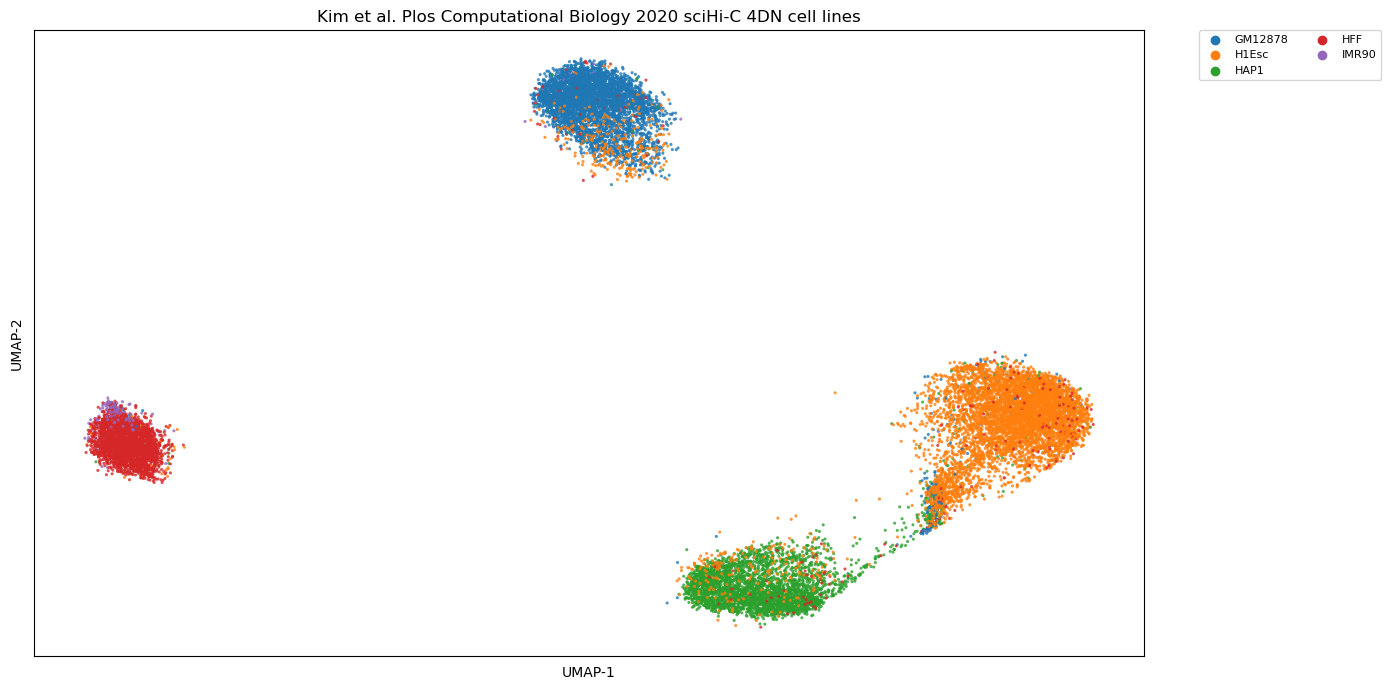

In [39]:
fig = plt.figure(figsize=(14, 7))
col = 'cell type'
ax=sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=wrapper_all.label_info[col], s=5, alpha=0.8, linewidth=0, palette=None, hue_order=np.unique(wrapper_all.label_info[col]))
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2, prop={'size':8})
ax.grid(False)
# Hide axes ticks 
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP-1')
ax.set_ylabel('UMAP-2')
ax.set_title( "Kim et al. Plos Computational Biology 2020 sciHi-C 4DN cell lines")
plt.tight_layout()
plt.show()
